# Table of Contents

1. [Business understanding](#business)
2. [Data understanding](#data)
3. [Prepare data](#prepare)
4. [Question 1: Which are the most expensive days to make a reservation?](#question1)
5. [Question 2: What is the evolution of booking prices over the course of a year?](#question2)
6. [Question 3: How do booking prices evolve depending on the type of property?](#question3)


<a id="business"></a>

# 1. Business understanding 
We will conduct an analysis of the data provided by Airnbn in 2016 for the city of Seattle. The objective of this analysis will be to provide valuable information to both users and potential users of Airbnb on the evolution of prices depending on various factors such as the time of year or the type of accommodation. With this information Airbnb users will have valuable information to decide, depending on their budget, which will be the best time to visit Seattle or what type of accommodation is the most convenient for them.

The questions to which we will try to provide answers are as follows:

1. Which are the most expensive days to make a reservation?
2. What is the evolution of booking prices over the course of a year?
3. How do booking prices evolve depending on the type of property?

<a id="data"></a>

# 2. Data understanding 
The first thing we have to do is to read the data and load all the libraries we need: pandas and numpy. We will also need matplotlib and seaborn to produce simple graphs.

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read calendar, listings csv
calendar_df = pd.read_csv('calendar.csv')
listing_df = pd.read_csv('listings.csv')


Let's review the data we have uploaded from 'calendar.csv'. We will retrieve the first records to get an idea of the information it contains.

In [352]:
# We visualize the first records
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [353]:
# We return the description of the data
calendar_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


As we can see the information is easy to understand and self-explanatory so we do not need to go on analyzing more aspects to understand it. 

Let's do the same to analyze the content of 'listings.csv'

In [354]:
# We visualize the first records
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


This time we see that we have much more varied information (92 columns). To better understand the information we are going to work with, it will be necessary to determine the quantitative variables we have, visualize them and even show the correlation between them.

In [355]:
# We return the description of the data
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'scrape_id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'host_listings_count'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>],
       [<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>],
       [<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'square_feet'}>,
        <AxesSubplot: title={'center': 'guests_included'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>],
       [<AxesSubplot: title={'center': 'availability_30'}>,
        <AxesSubplot: title={'center': 'availability_60'}>,
        <AxesSubplot: title={'center

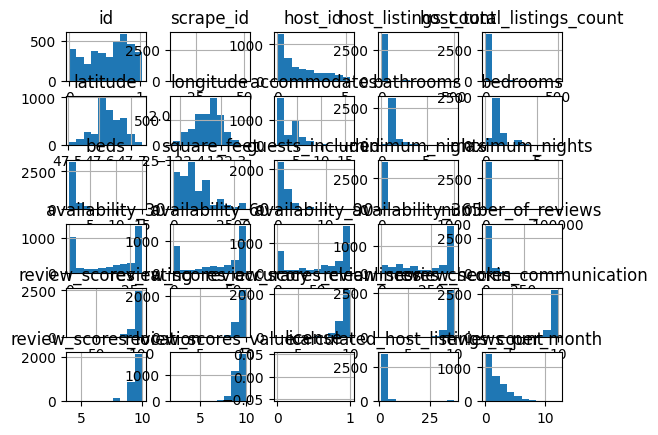

In [356]:
# We plot the distribution of the data
listing_df.hist()

/tmp/ipykernel_251/651707353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listing_df.corr(), annot=False, fmt=".2f");


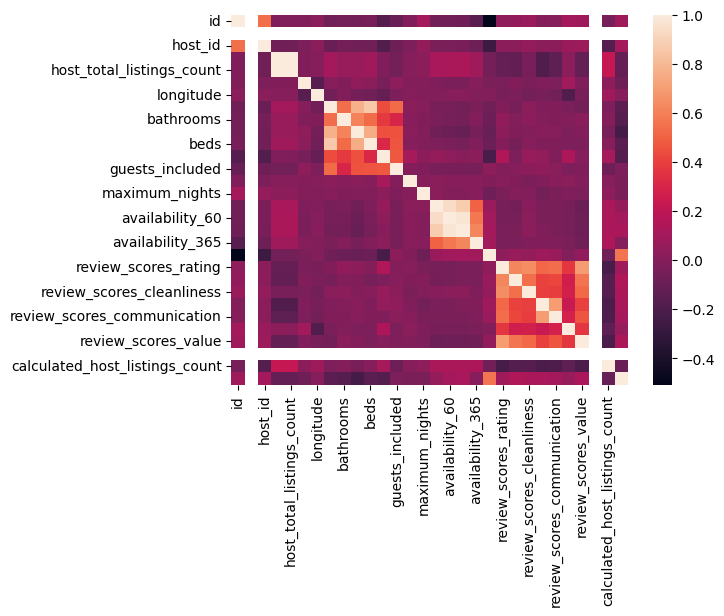

In [357]:
# We plot the correlation between the data
sns.heatmap(listing_df.corr(), annot=False, fmt=".2f");

<a id="prepare"></a>

# 3. Prepare data 
In our analysis, in order to work with the price we need to convert it to the format we need (float without the '$' symbol). To do this we are going to define the following function that allows us to make this change

In [358]:
def change_price_format(df, column):
    '''
    INPUT 
        df - a dataframe containing the data
        column - name of the column containing the price in $ format
        
    OUTPUT
        column_out - column with the price formatted
        
    '''
    
    column_out = df[column].replace('[\$,]', '', regex=True).astype(float)
    return column_out

In [359]:
# We format the price in calendar_df 
calendar_df['price'] = change_price_format(calendar_df,'price')
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [360]:
# We format the price in listing_df 
listing_df['price'] = change_price_format(listing_df,'price')
listing_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


We have also identified that we need to convert the date in 'calendar.csv' to datetime format. To do this we define the following function

In [361]:
def change_date_format(df, column):
    '''
    INPUT 
        df - a dataframe containing the data
        column - name of the column containing the date
        
    OUTPUT
        column_out - column with the date formatted as datetime
        
    '''
    
    column_out = pd.to_datetime(df[column])
    return column_out

In [362]:
# We format the date as datetime
calendar_df['date'] = change_date_format(calendar_df, 'date')
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


Once we have applied the necessary formatting changes we can carry out our work. We are going to analyze if the data set we have is the correct one, if we have to eliminate null values or impute values.

In the case of the calendar_df dataframe, we note that for our analysis we are only interested in working with the dates on which there was available accommodation. 

In addition, the column 'listing_id' does not give us any value so we can drop it.

In [363]:
# We drop column listing_id in calendar_df
calendar_df = calendar_df.drop('listing_id', axis=1)
calendar_df

,date,available,price
0,2016-01-04,t,85.0
1,2016-01-05,t,85.0
2,2016-01-06,f,NaN
3,2016-01-07,f,NaN
4,2016-01-08,f,NaN
...,...,...,...
1393565,2016-12-29,f,NaN
1393566,2016-12-30,f,NaN
1393567,2016-12-31,f,NaN
1393568,2017-01-01,f,NaN


In [364]:
# We only need to work with the dates on which we have accommodations available.
calendar_df = calendar_df[calendar_df['available']=='t']
calendar_df

,date,available,price
0,2016-01-04,t,85.0
1,2016-01-05,t,85.0
9,2016-01-13,t,85.0
10,2016-01-14,t,85.0
14,2016-01-18,t,85.0
...,...,...,...
1393207,2016-01-06,t,87.0
1393208,2016-01-07,t,87.0
1393211,2016-01-10,t,87.0
1393212,2016-01-11,t,87.0


In [365]:
# Finally we eliminate the column 'available' as it's not necessary
calendar_df = calendar_df.drop('available', axis=1)
calendar_df

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0
...,...,...
1393207,2016-01-06,87.0
1393208,2016-01-07,87.0
1393211,2016-01-10,87.0
1393212,2016-01-11,87.0


We have already prepared the data in caldendar_df to be able to answer the first two questions. We are going to follow the same process to prepare the listind_id data we are going to work with.

In this case we are going to analyze the variability of the price depending on the type of property, therefore we can reduce our dataframe to these two columns.

In [366]:
# We will work only with the columns 'property_type' and 'price'
listing_df = listing_df[['property_type', 'price']]
listing_df

,property_type,price
0,Apartment,85.0
1,Apartment,150.0
2,House,975.0
3,Apartment,100.0
4,House,450.0
...,...,...
3813,House,359.0
3814,Apartment,79.0
3815,House,93.0
3816,Condominium,99.0


Let's determine the number of null values we have in the price and determine if we can eliminate those values or if we have to impute them.

In [367]:
# We calculate the null values we have in the price
np.sum(listing_df['price'].isnull() == 1)

0

We can see that we do not have null values, so it will not be necessary to delete or impute values.

<a id="question1"></a>

# 4. Question 1: Which are the most expensive days to make a reservation? 

To try to answer this question we will group the data by date (days), calculate the average booking price and show as a reference sample the first 20 days with the highest average booking price.

In [368]:
# We group by date and calculate the mean value
avg_price_day_df = calendar_df.groupby(['date']).mean().sort_values(by='price', ascending=False)
avg_price_day_df.rename(columns={'price':'mean price ($)'},inplace=True)
avg_price_day_df

,mean price ($)
date,
2016-07-01,157.480000
2016-07-02,157.080967
2016-07-09,156.448161
2016-07-15,156.365385
2016-07-08,156.260469
...,...
2016-01-13,118.680019
2016-01-25,118.232766
2016-01-27,118.148863


Text(0.5, 1.0, 'Days with the highest average price ($)')

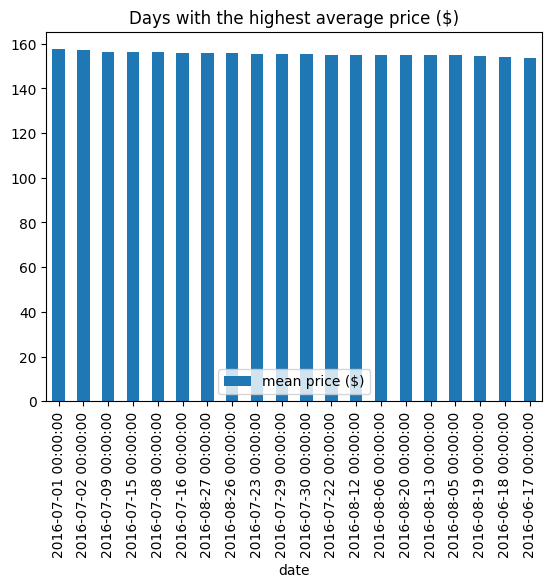

In [369]:
# We represent the 20 days with highest mean price
avg_price_day_df[:20].plot(kind='bar');
plt.title('Days with the highest average price ($)')


We can observe that the 20 most expensive days of the year are concentrated in the summer months (July and August). This can give us an idea of which will be more expensive to make a reservation. With the analysis of our second question, we will know if it is a question of specific days or if the summer months are really the most expensive months to make reservations.

<a id="question2"></a>

# 5. Question 2: What is the evolution of booking prices over the course of a year? 

To try to answer this question we will group the data by month and calculate the average value of the booking price. We will plot the evolution of the price over the months (January-December).

In [370]:
# We calculate the mean price per month
avg_price_month_df = calendar_df.groupby(calendar_df.date.dt.month).mean()
avg_price_month_df


/tmp/ipykernel_251/3141658209.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_month_df = calendar_df.groupby(calendar_df.date.dt.month).mean()


,price
date,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Text(0.5, 1.0, 'Average monthly Airbnb price in Seattle ($)')

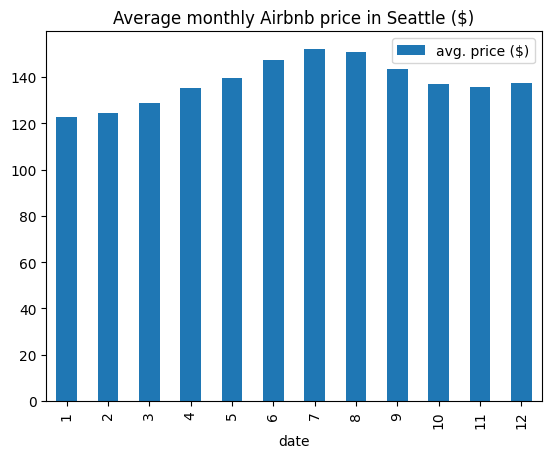

In [371]:
# We represent the values obtained
avg_price_month_df.rename(columns={'date':'month', 'price':'avg. price ($)' },inplace=True)
avg_price_month_df.plot(kind='bar');
plt.title('Average monthly Airbnb price in Seattle ($)')

We can see from the analysis carried out to answer this second question that the summer months, especially July and August, are the months in which reservations are the most expensive. This confirms the result obtained in the analysis of the first question, that the most expensive days of the year are concentrated in these months is not a one-off event, but follows the general dynamics of prices for these months.

<a id="question3"></a>

# 6. Question 3: How do booking prices evolve depending on the type of property? 

To try to answer this question we will group the data by type of property and calculate the average value of the booking price. We will represent the average booking price by type of property, from the most expensive to the cheapest.

In [372]:
# We calculate the mean price per property
avg_price_property_df = listing_df.groupby(['property_type']).mean().sort_values(by='price', ascending=False)
avg_price_property_df



,price
property_type,
Boat,282.375000
Condominium,151.109890
Loft,135.700000
House,132.351414
Townhouse,129.457627
Apartment,122.932670
Camper/RV,120.461538
Bungalow,115.615385
Bed & Breakfast,112.054054


Text(0.5, 1.0, 'Average price per Airbnb property type in Seattle')

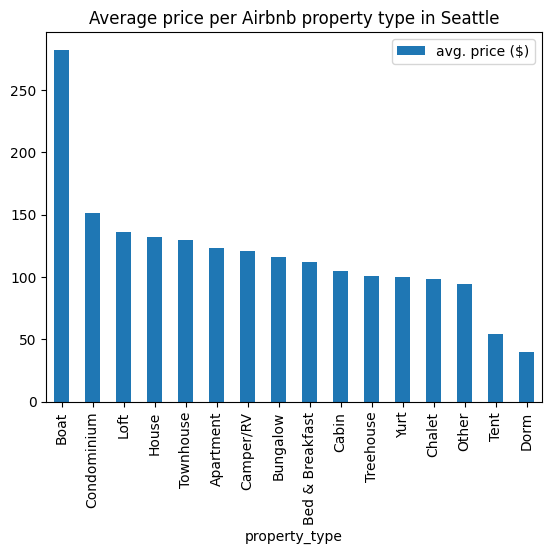

In [373]:
# We plot the values obtained
avg_price_property_df.rename(columns={'property_type':'property', 'price':'avg. price ($)' },inplace=True)
avg_price_property_df.plot(kind='bar');
plt.title('Average price per Airbnb property type in Seattle')

We can observe from the results obtained that we find very extreme values, those in which the average price is close to $300 (boat) or, on the contrary, those cases in which it is close to or does not exceed $50 (tent, dorm).

If we exclude these extremes we can find a great variety of accommodations (13 different types) in the $50 range. This is, from the point of view of the Airbnb user, very good. It indicates that the users have at their disposal a wide variety of types of accommodations to choose from with a not very significat difference in price. 